In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import torch
import fastai
%config completer.use_jedi=False

In [2]:
from fastai import *
from fastai.vision import *
from fastai.vision.all  import *

In [3]:
!unzip "/content/flowers.zip" && rm*.zip

Archive:  /content/flowers.zip
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/105558265

In [4]:
tfms_for_item=RandomResizedCrop(128,min_scale=0.35)
tfms_for_batch=[Normalize.from_stats(*imagenet_stats)]

In [5]:
data_path="/content/flowers"

In [6]:


data=ImageDataLoaders.from_folder(data_path,item_tfms=tfms_for_item,
                                  batch_tfms=tfms_for_batch,
                                  valid_pct=0.15, shuffle=True)

In [30]:
files = get_image_files(data_path)
print(len(files))
files[0],files[4116]

4323


(Path('/content/flowers/dandelion/5875763050_82f32f2eed_m.jpg'),
 Path('/content/flowers/sunflower/9610371852_179e7781ce.jpg'))

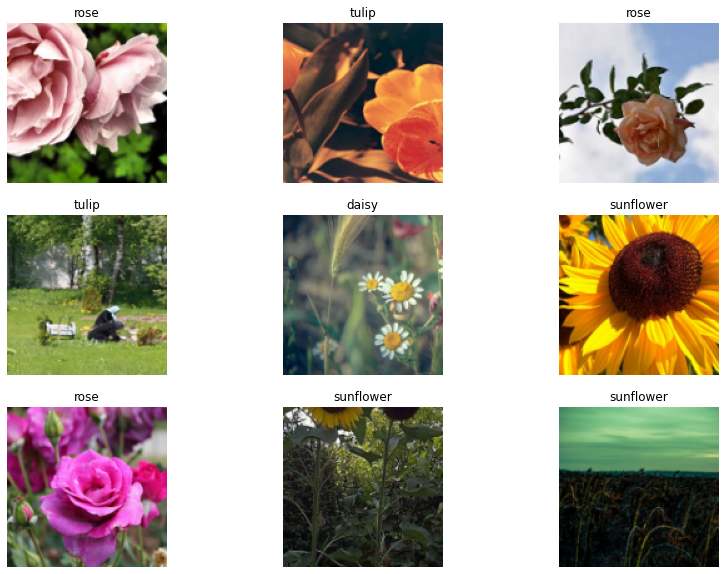

In [7]:
data.show_batch(figsize=(14,10))

In [8]:
import fastai

In [9]:
print('number of classes', data.c)

number of classes 5


In [10]:
model=cnn_learner(data,resnet34,metrics=accuracy,model_dir='/tmp/model/')

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0010000000474974513)

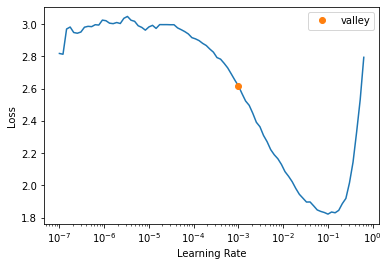

In [13]:
model.lr_find()

In [16]:
model.fit_one_cycle(3,0.001)

epoch,train_loss,valid_loss,accuracy,time
0,1.271601,0.447377,0.851852,05:06
1,0.790284,0.383495,0.882716,05:08
2,0.612019,0.355624,0.888889,05:06


In [17]:
model.save('flower_fastai_model.pkl')

Path('/tmp/model/flower_fastai_model.pkl.pth')

In [31]:
model.predict(files[4116])

('sunflower',
 TensorBase(3),
 TensorBase([4.2088e-03, 4.2976e-04, 6.9642e-04, 9.9466e-01, 6.9155e-06]))

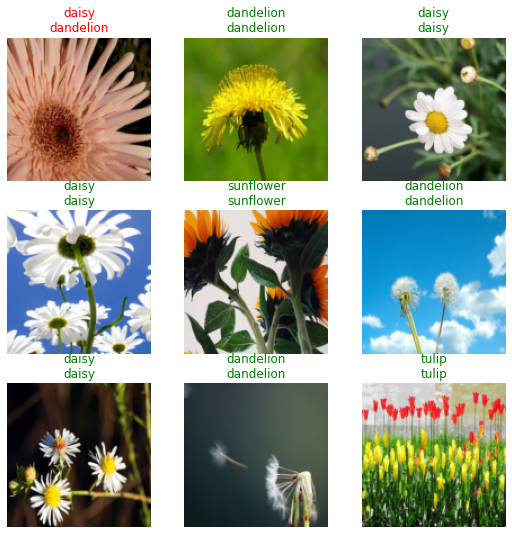

In [24]:
model.show_results()

In [28]:
interpretation=ClassificationInterpretation.from_learner(model)

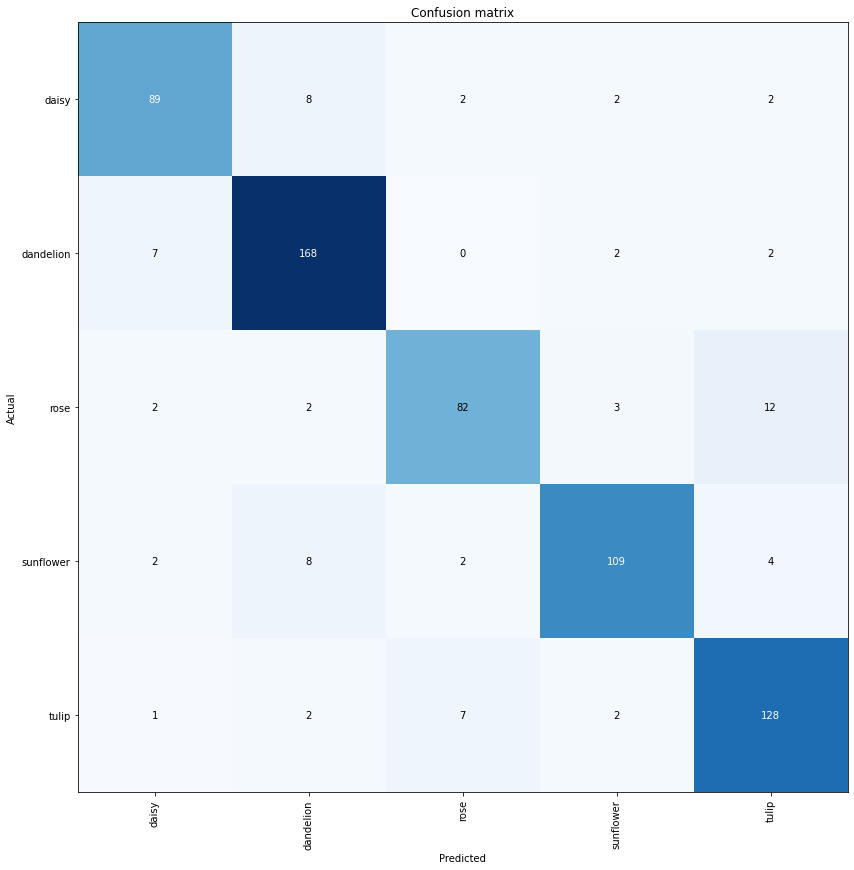

In [29]:
interpretation.plot_confusion_matrix(figsize=(12,12))

In [32]:
interpretation.most_confused(min_val=2)

[('rose', 'tulip', 12),
 ('daisy', 'dandelion', 8),
 ('sunflower', 'dandelion', 8),
 ('dandelion', 'daisy', 7),
 ('tulip', 'rose', 7),
 ('sunflower', 'tulip', 4),
 ('rose', 'sunflower', 3),
 ('daisy', 'rose', 2),
 ('daisy', 'sunflower', 2),
 ('daisy', 'tulip', 2),
 ('dandelion', 'sunflower', 2),
 ('dandelion', 'tulip', 2),
 ('rose', 'daisy', 2),
 ('rose', 'dandelion', 2),
 ('sunflower', 'daisy', 2),
 ('sunflower', 'rose', 2),
 ('tulip', 'dandelion', 2),
 ('tulip', 'sunflower', 2)]

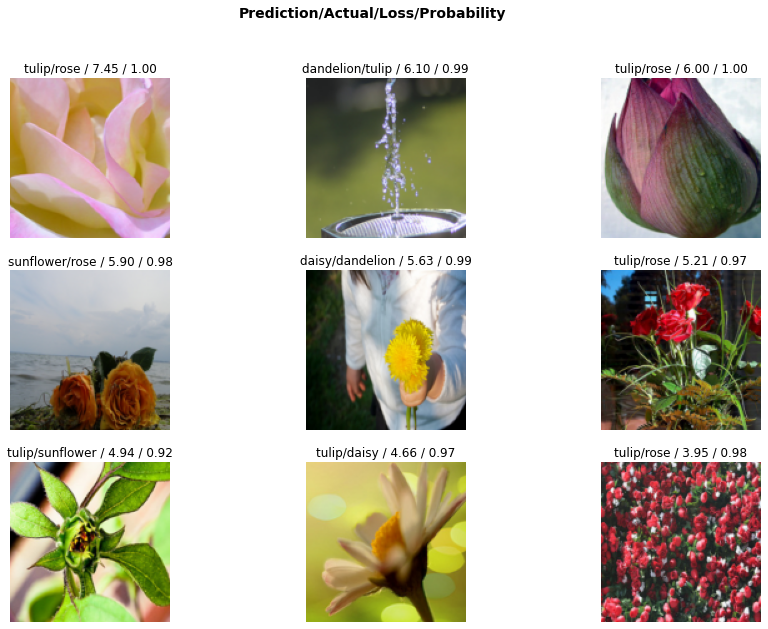

In [34]:
interp = Interpretation.from_learner(model)
interp.plot_top_losses(9, figsize=(15,10))